In [33]:
import pandas, seaborn, gseapy
import scipy.stats as stats
import matplotlib, matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
from gseapy import barplot, dotplot

In [75]:
from IPython.display import display, HTML

# Ajuste la largeur du contenu
display(HTML("<style>.container { width: 90% !important; }</style>"))

In [4]:
file_directory = "/Users/kja11/OneDrive - Menntaský (1)/Mild_Hypothermia_project/in_silico/Python/"

In [67]:
input_dir = "1) input/colab/katrin/"
output_dir = "3) output/colab/"

In [6]:
#data Proteomics
df = pandas.read_csv(file_directory + input_dir + 'clustered_sign_genes2.csv', 
                     sep = ',', index_col = 'gene')

print(df.shape, '\n')
df.head(3)

(3255, 14) 



Unnamed: 0  cluster     NPC_A     NPC_B     NPC_C    Day3_A    Day3_B  \
gene                                                                            
Vmn1r39    Vmn1r39        4  7.080386  6.891838  6.887197  7.288417  7.246752   
Fmnl1        Fmnl1        4  7.496718  7.349293  7.036075  7.708328  7.890825   
Gm17229    Gm17229        4  6.954820  7.045318  6.737922  7.215380  7.329612   

           Day3_C    Day6_A    Day6_B    Day6_C   Day12_A   Day12_B   Day12_C  
gene                                                                           
Vmn1r39  7.351137  7.159928  7.210986  7.349563  7.181322  7.487793  7.409872  
Fmnl1    7.752489  7.657372  7.913066  7.711263  8.073711  7.945169  7.790759  
Gm17229  7.306250  7.071991  7.464026  7.335701  7.479040  7.712204  7.409872

## Remove cluster column. do a new one. Find best number cluster. Can do like that or mean of the triplicate 

In [7]:
# too much Clusters
print(df.cluster.max())
df = df.drop(['Unnamed: 0', 'cluster'], axis =1)
df.head()

21


NPC_A     NPC_B     NPC_C    Day3_A    Day3_B    Day3_C    Day6_A  \
gene                                                                            
Vmn1r39  7.080386  6.891838  6.887197  7.288417  7.246752  7.351137  7.159928   
Fmnl1    7.496718  7.349293  7.036075  7.708328  7.890825  7.752489  7.657372   
Gm17229  6.954820  7.045318  6.737922  7.215380  7.329612  7.306250  7.071991   
Mafb     7.266746  7.197938  7.158831  7.621378  7.749131  7.628158  7.573230   
Cdk3-ps  7.044374  7.004260  6.996245  7.396227  7.373923  7.336569  7.294714   

           Day6_B    Day6_C   Day12_A   Day12_B   Day12_C  
gene                                                       
Vmn1r39  7.210986  7.349563  7.181322  7.487793  7.409872  
Fmnl1    7.913066  7.711263  8.073711  7.945169  7.790759  
Gm17229  7.464026  7.335701  7.479040  7.712204  7.409872  
Mafb     7.899710  7.782313  7.649337  7.647141  7.603712  
Cdk3-ps  7.365030  7.473144  7.349608  7.466510  7.309513

In [8]:
# Convert to Z_score
df_zscore = stats.zscore(df, axis = 1)
df_zscore.head(2)

NPC_A     NPC_B     NPC_C    Day3_A    Day3_B    Day3_C    Day6_A  \
gene                                                                            
Vmn1r39 -0.731062 -1.777581 -1.803338  0.423593  0.192336  0.771716 -0.289572   
Fmnl1   -0.719787 -1.258336 -2.402535  0.053232  0.719902  0.214556 -0.132913   

           Day6_B    Day6_C   Day12_A   Day12_B   Day12_C  
gene                                                       
Vmn1r39 -0.006181  0.762982 -0.170828  1.530213  1.097721  
Fmnl1    0.801149  0.063954  1.387994  0.918425  0.354358

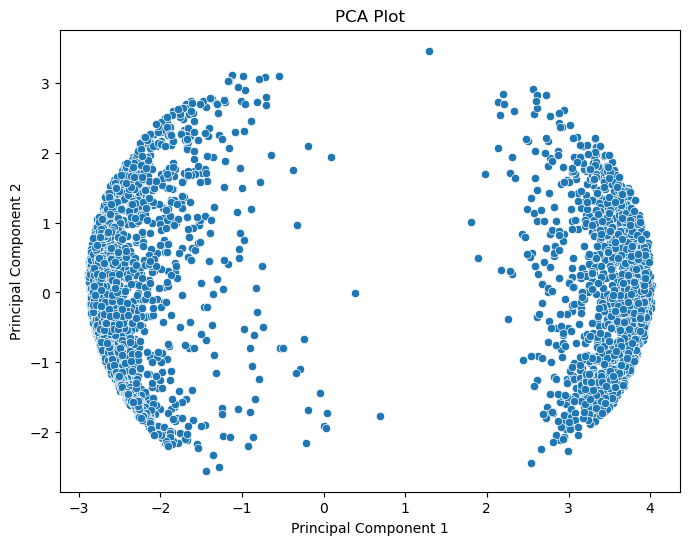

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # We choose 2 components for 2D plot
principal_components = pca.fit_transform(df_zscore)
pca_df = pandas.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


plt.figure(figsize=(8,6))
seaborn.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

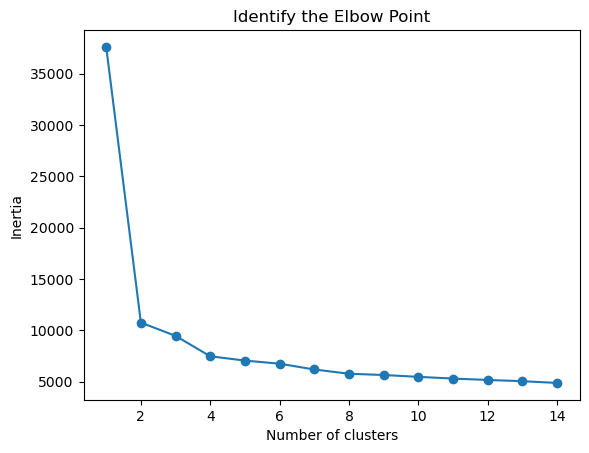

In [10]:
# Calculate Similarity/Distance
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
# "inertia" is the sum of squared distances of samples to their closest cluster center.
inertia = []
for n_clusters in range(1, 15):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans.fit(df_zscore)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 15), inertia, marker='o')
plt.title('Identify the Elbow Point')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

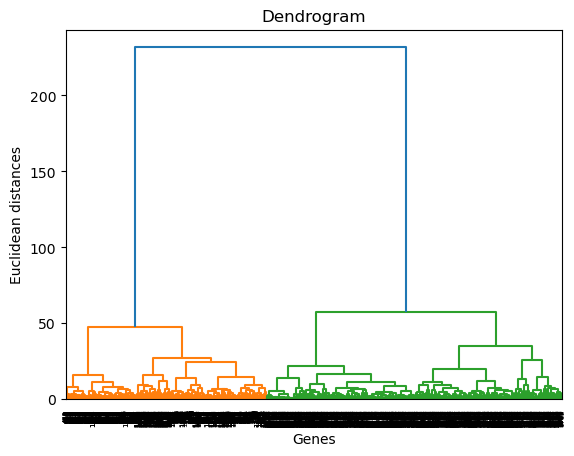

In [11]:
import scipy.cluster.hierarchy as sch

# Create the dendrogram to determine the optimal clusters
dendrogram = sch.dendrogram(sch.linkage(df_zscore, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Genes')
plt.ylabel('Euclidean distances')
plt.show()

C:\Users\kja11\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


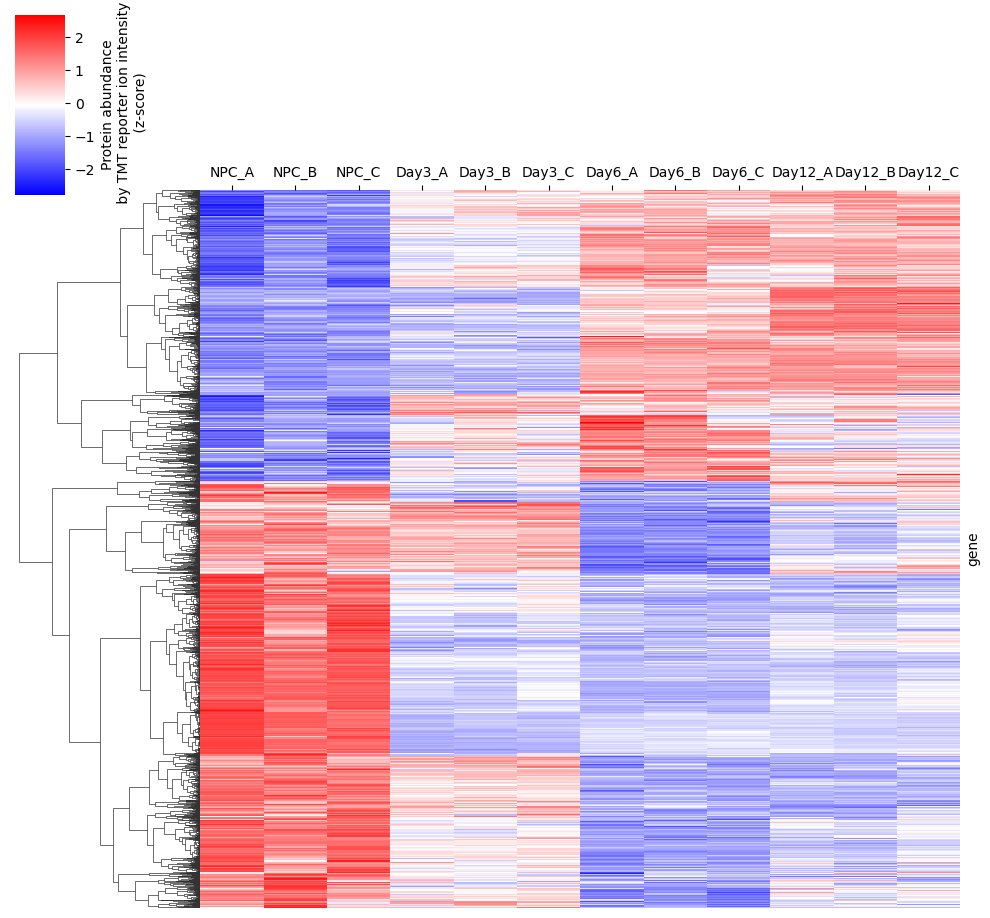

In [12]:
## plot heatmap
g =  seaborn.clustermap(df_zscore, 
                        cmap='bwr', 
                        row_cluster=True, 
                        col_cluster=False, 
#                         vmin=-6.5, vmax=6.5,
                        cbar_kws={'label':'Protein abundance\n by TMT reporter ion intensity\n (z-score)'},
                        xticklabels=True, yticklabels=False, 
                        method='complete', metric='cosine')

g.ax_heatmap.xaxis.set_ticks_position('top')
g.ax_heatmap.xaxis.set_label_position('top')

## GROUPED

In [17]:
df.head()

NPC_A     NPC_B     NPC_C    Day3_A    Day3_B    Day3_C    Day6_A  \
gene                                                                            
Vmn1r39  7.080386  6.891838  6.887197  7.288417  7.246752  7.351137  7.159928   
Fmnl1    7.496718  7.349293  7.036075  7.708328  7.890825  7.752489  7.657372   
Gm17229  6.954820  7.045318  6.737922  7.215380  7.329612  7.306250  7.071991   
Mafb     7.266746  7.197938  7.158831  7.621378  7.749131  7.628158  7.573230   
Cdk3-ps  7.044374  7.004260  6.996245  7.396227  7.373923  7.336569  7.294714   

           Day6_B    Day6_C   Day12_A   Day12_B   Day12_C  
gene                                                       
Vmn1r39  7.210986  7.349563  7.181322  7.487793  7.409872  
Fmnl1    7.913066  7.711263  8.073711  7.945169  7.790759  
Gm17229  7.464026  7.335701  7.479040  7.712204  7.409872  
Mafb     7.899710  7.782313  7.649337  7.647141  7.603712  
Cdk3-ps  7.365030  7.473144  7.349608  7.466510  7.309513

In [14]:
df_group = df.copy()
df_group.columns = df_group.columns.str.split('_').str[0]

In [15]:
df_group = df_group.groupby(axis=1, level=0).median()
df_group = df_group[['NPC', 'Day3', 'Day6', 'Day12']]
df_group

NPC      Day3      Day6     Day12
gene                                                 
Vmn1r39        6.891838  7.288417  7.210986  7.409872
Fmnl1          7.349293  7.752489  7.711263  7.945169
Gm17229        6.954820  7.306250  7.335701  7.479040
Mafb           7.197938  7.628158  7.782313  7.647141
Cdk3-ps        7.004260  7.373923  7.365030  7.349608
...                 ...       ...       ...       ...
Gngt2          7.312516  7.103276  6.737922  6.972543
A830005F24Rik  7.490846  7.387982  7.085770  7.181322
Spata18        7.036075  7.010907  6.737922  6.737922
Gatsl3         7.312516  7.221766  6.949488  7.024790
1700011I03Rik  7.158831  7.038852  6.737922  6.873480

[3255 rows x 4 columns]

In [18]:
# Convert to Z_score
df_zscore_group = stats.zscore(df_group, axis = 1)
df_zscore_group.head(2)

NPC      Day3      Day6     Day12
gene                                           
Vmn1r39 -1.609233  0.459848  0.055865  1.093521
Fmnl1   -1.579838  0.292212  0.100795  1.186830

C:\Users\kja11\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


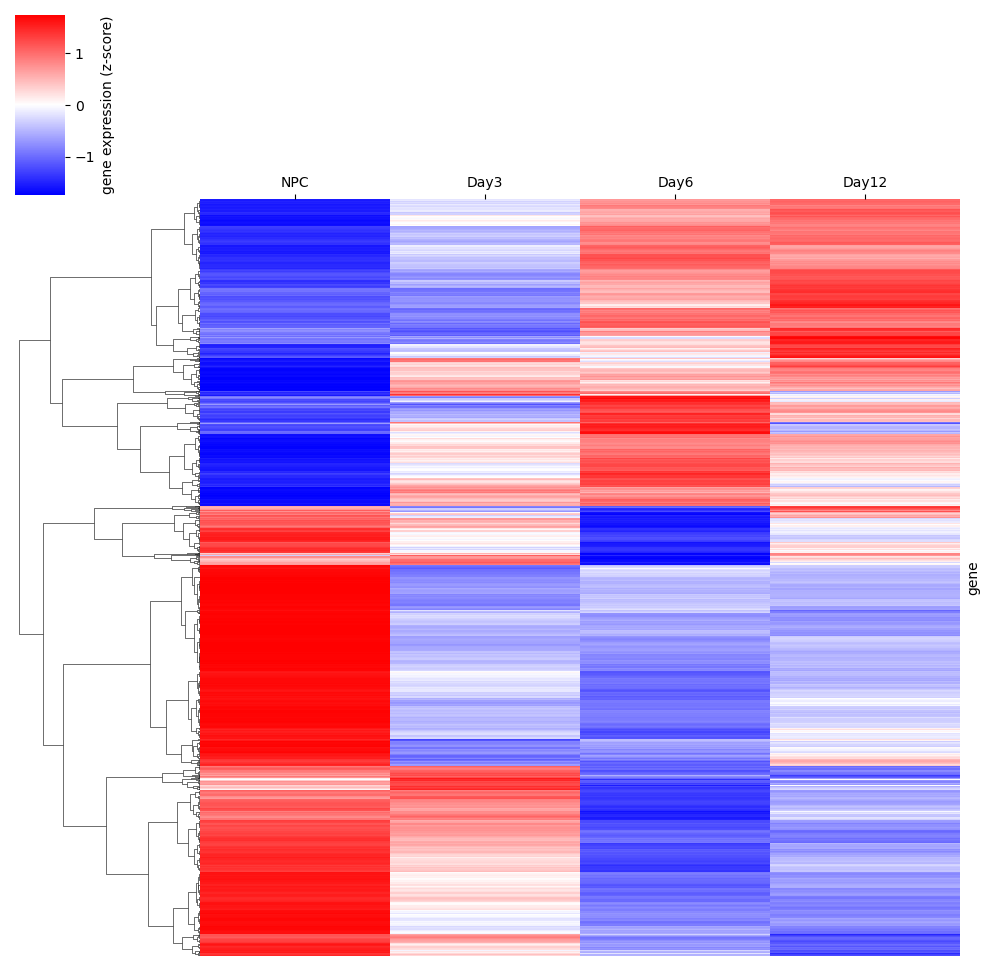

In [19]:
## plot heatmap
g =  seaborn.clustermap(df_zscore_group, 
                        cmap='bwr', 
                        row_cluster=True, 
                        col_cluster=False, 
#                         vmin=-6.5, vmax=6.5,
                        cbar_kws={'label':'gene expression (z-score)'},
                        xticklabels=True, yticklabels=False, 
                        method='complete', metric='cosine')

g.ax_heatmap.xaxis.set_ticks_position('top')
g.ax_heatmap.xaxis.set_label_position('top')

In [77]:
sample_names = df_zscore_group.index
num_samples = len(sample_names)

reordered_indices = g.dendrogram_row.reordered_ind #the index in the heatmap
linkage_matrix  = g.dendrogram_row.linkage #the matrix for heatmap
num_clusters = 13 # cluster expected

#Get the cluster labels for each sample
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
print(cluster_labels[:10])

# Loop to group samples into clusters
subgroups = {}
for cluster_id in range(1, num_clusters + 1):
    # Create a subgroup for the current cluster ID
    subgroups[cluster_id] = [sample_names[i] for i in range(len(sample_names)) if cluster_labels[i] == cluster_id]
    # Print the count and preview of the subgroup
    print(f'n = {len(subgroups[cluster_id])} in cluster {cluster_id}')

[2 2 2 6 2 6 2 2 2 2]
n = 681 in cluster 1
n = 142 in cluster 2
n = 25 in cluster 3
n = 109 in cluster 4
n = 52 in cluster 5
n = 309 in cluster 6
n = 27 in cluster 7
n = 175 in cluster 8
n = 55 in cluster 9
n = 862 in cluster 10
n = 102 in cluster 11
n = 355 in cluster 12
n = 361 in cluster 13


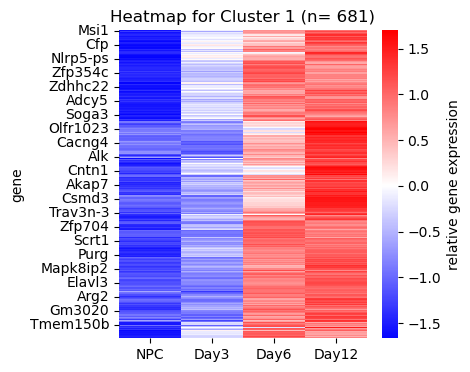

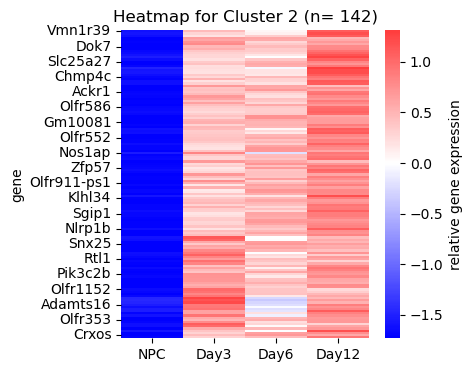

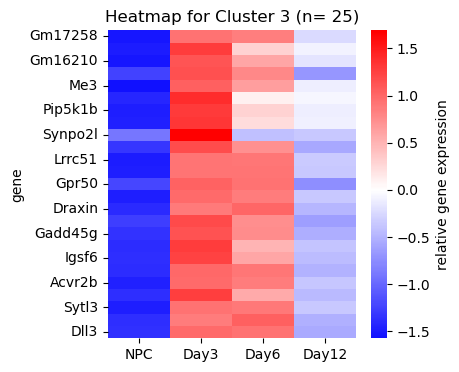

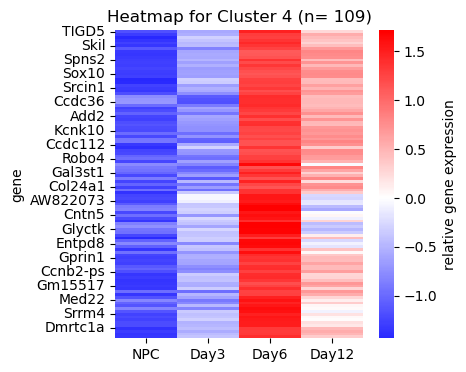

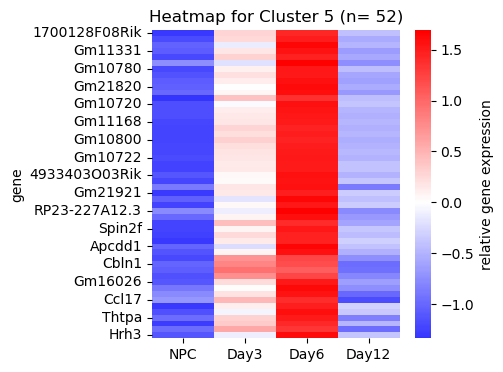

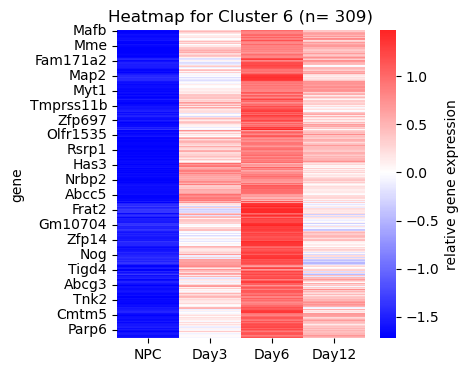

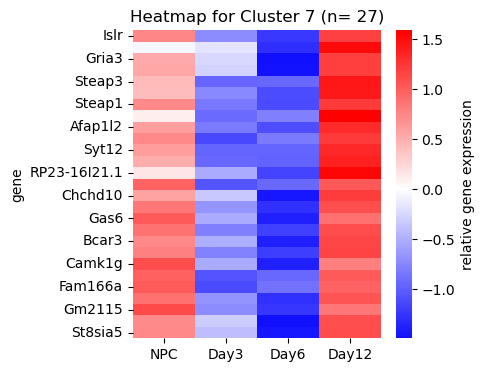

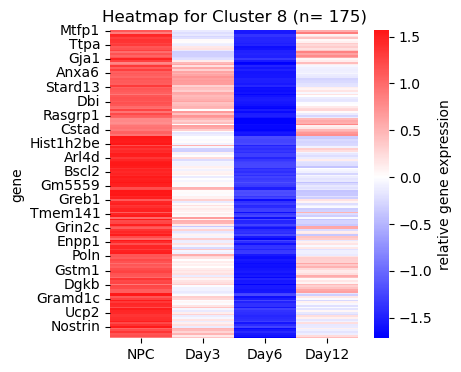

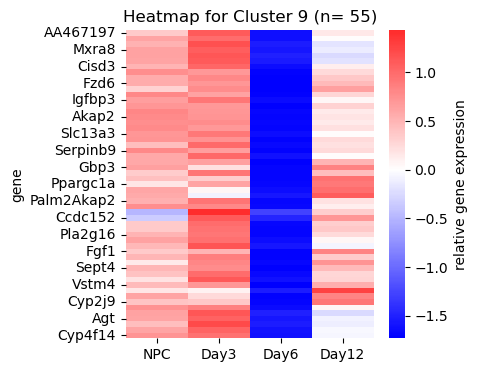

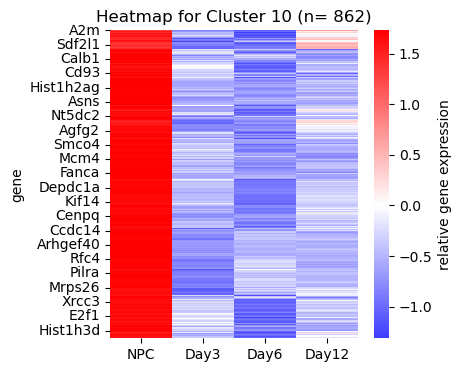

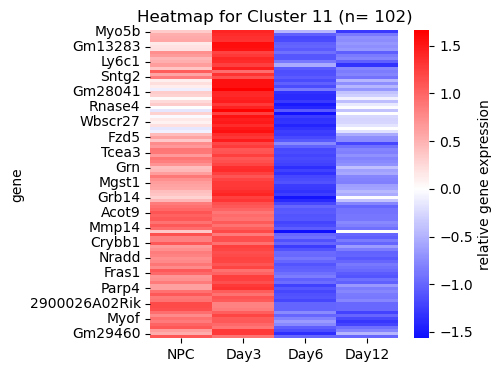

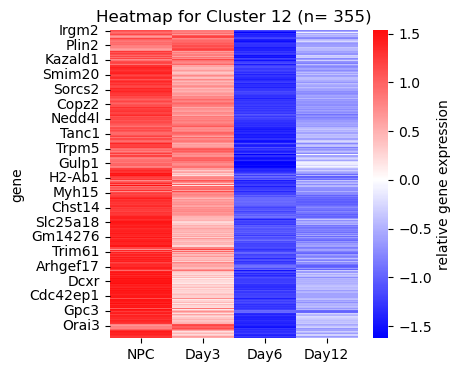

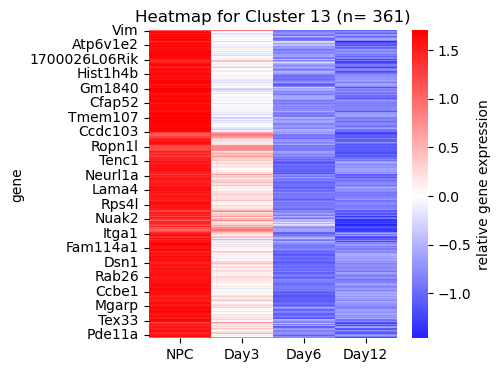

In [82]:
# Visualize the heatmaps for each subgroup
for cluster_id, subgroup in subgroups.items():
    if len(subgroup) > 0:  # Only plot if the subgroup is not empty
        plt.figure(figsize=(4, 4))
        seaborn.heatmap(df_zscore_group[df_zscore_group.index.isin(subgroup)], annot=False, 
                        cmap="bwr", linewidths=0, center=0, cbar_kws={'label': 'relative gene expression'})
        plt.title(f'Heatmap for Cluster {cluster_id} (n= {len(subgroup)})')
        plt.show()

In [70]:
max_length = max(len(subgroup) for subgroup in subgroups.values())
print(max_length)

df_clusters = pandas.DataFrame()

for cluster_id, subgroup in subgroups.items():
    padded_subgroup = subgroup + ["DEL"] * (max_length - len(subgroup)) # Add random value to have all columns same length
    df_clusters[f'cluster_{cluster_id}'] = padded_subgroup
    
print(df_clusters)

# df_clusters.to_csv(file_directory+output_dir+'katrin_clusters_df.csv', sep=',', index=False)
df_clusters.head()

862
         cluster_1 cluster_2 cluster_3 cluster_4      cluster_5 cluster_6  \
0             Msi1   Vmn1r39   Gm17258     TIGD5  1700128F08Rik      Mafb   
1             Cbx7     Fmnl1     Slit2   Gm26920          Xirp2     Nuak1   
2            Cnnm1   Gm17229   Gm16210     Zfp94        Gm14300      Wnk2   
3    RP23-349M18.1   Cdk3-ps       Sds    Fbxo33        Gm11331   Pcdhb12   
4           Gm9670   Camk2n1       Me3      Pak3        Gm13988      Reck   
..             ...       ...       ...       ...            ...       ...   
857            DEL       DEL       DEL       DEL            DEL       DEL   
858            DEL       DEL       DEL       DEL            DEL       DEL   
859            DEL       DEL       DEL       DEL            DEL       DEL   
860            DEL       DEL       DEL       DEL            DEL       DEL   
861            DEL       DEL       DEL       DEL            DEL       DEL   

    cluster_7 cluster_8 cluster_9 cluster_10 cluster_11     cluster_12 

cluster_1 cluster_2 cluster_3 cluster_4      cluster_5 cluster_6  \
0           Msi1   Vmn1r39   Gm17258     TIGD5  1700128F08Rik      Mafb   
1           Cbx7     Fmnl1     Slit2   Gm26920          Xirp2     Nuak1   
2          Cnnm1   Gm17229   Gm16210     Zfp94        Gm14300      Wnk2   
3  RP23-349M18.1   Cdk3-ps       Sds    Fbxo33        Gm11331   Pcdhb12   
4         Gm9670   Camk2n1       Me3      Pak3        Gm13988      Reck   

  cluster_7 cluster_8 cluster_9 cluster_10 cluster_11     cluster_12  \
0      Islr     Mtfp1  AA467197        A2m      Myo5b          Irgm2   
1   Tmem108      Tph2     Sntb1    Hsd17b7       Tmie  1700001O22Rik   
2     Gria3      Gli2      Car6   Serpinf1    Gm13285         Tmem95   
3     As3mt  Sh3bgrl2     Mxra8      Lalba    Gm13288         Cyb5r2   
4    Steap3   Slc16a6   Creb3l2   Adamtsl3    Tspan17          Palmd   

  cluster_13  
0        Vim  
1       Nrn1  
2    Ccdc151  
3   Cdc42ep2  
4      Rptor

### Enrichr

In [41]:
import warnings
# Filter out the specific warning
warnings.filterwarnings("ignore", message="The 'method' keyword in Series.replace is deprecated")
warnings.filterwarnings("ignore", message="A value is trying to be set on a copy")

In [74]:
names = gseapy.get_library_name(organism='Human')
# names

Error in processing cluster 2: Warning: No enrich terms when cutoff = 0.05


C:\Users\kja11\anaconda3\Lib\site-packages\gseapy\plot.py:712: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(lambda _x: _x.sort_values(by=self.colname).tail(self.n_terms))


Error in processing cluster 4: Warning: No enrich terms when cutoff = 0.05
Error in processing cluster 5: Warning: No enrich terms when cutoff = 0.05


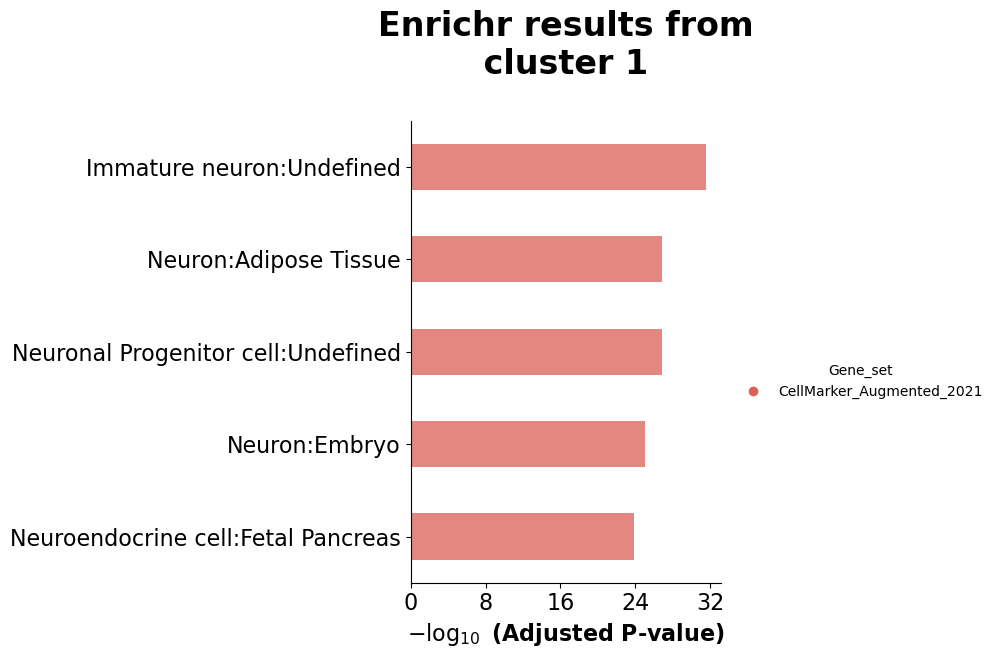

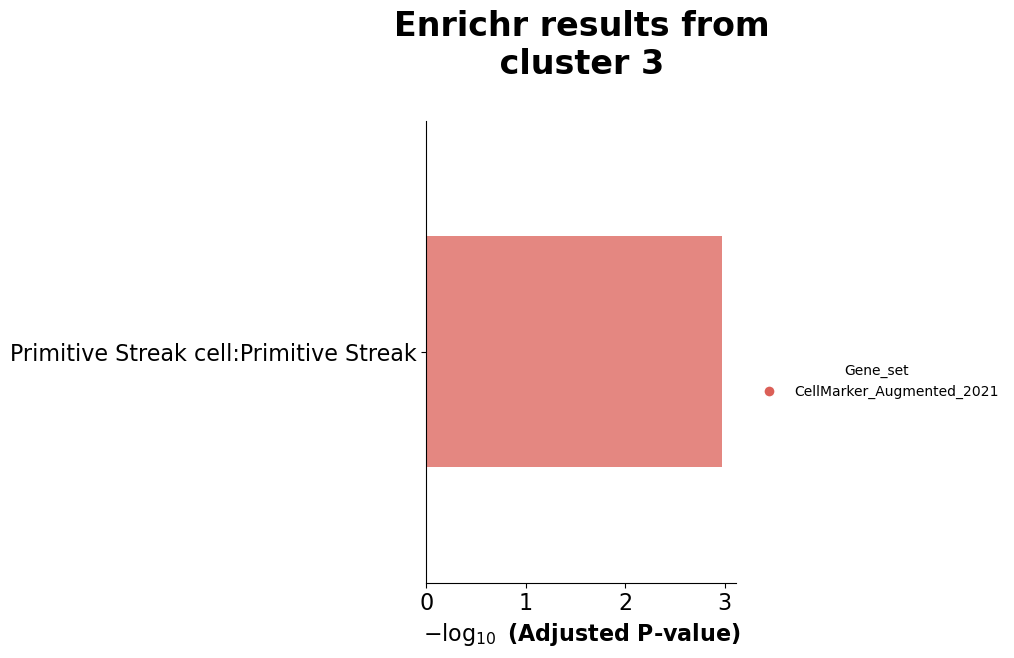

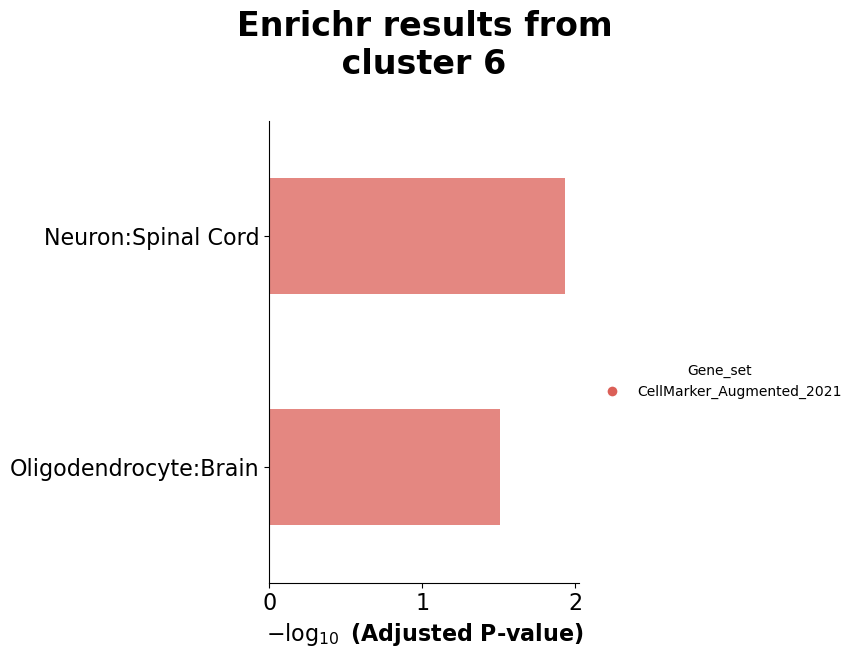

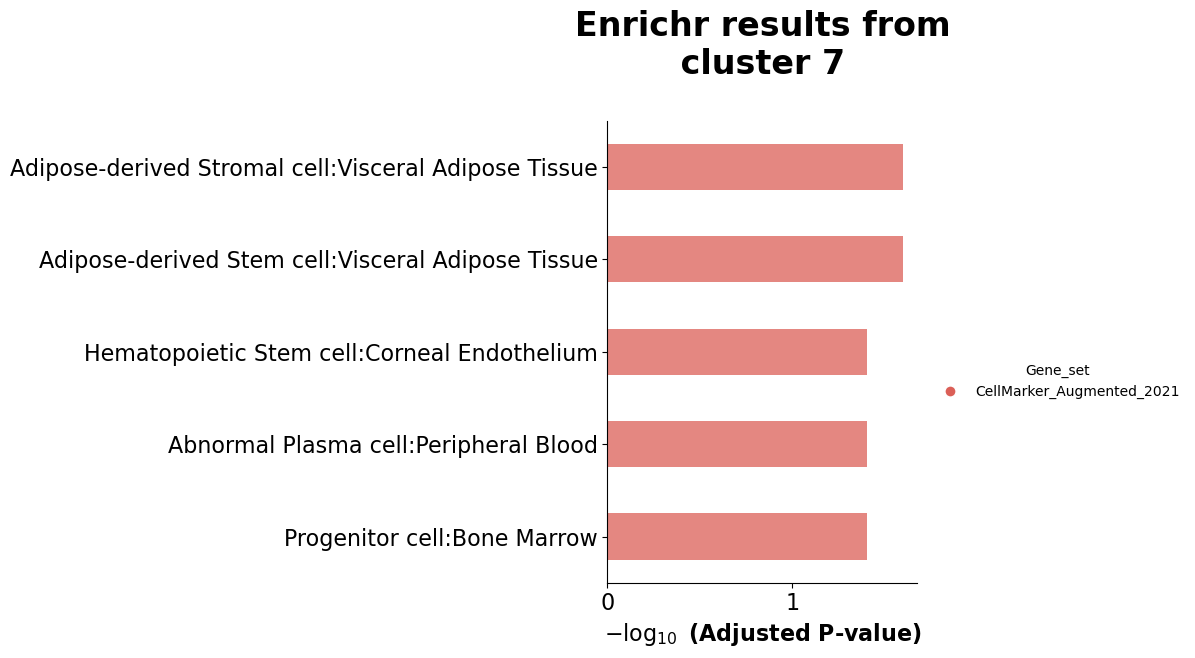

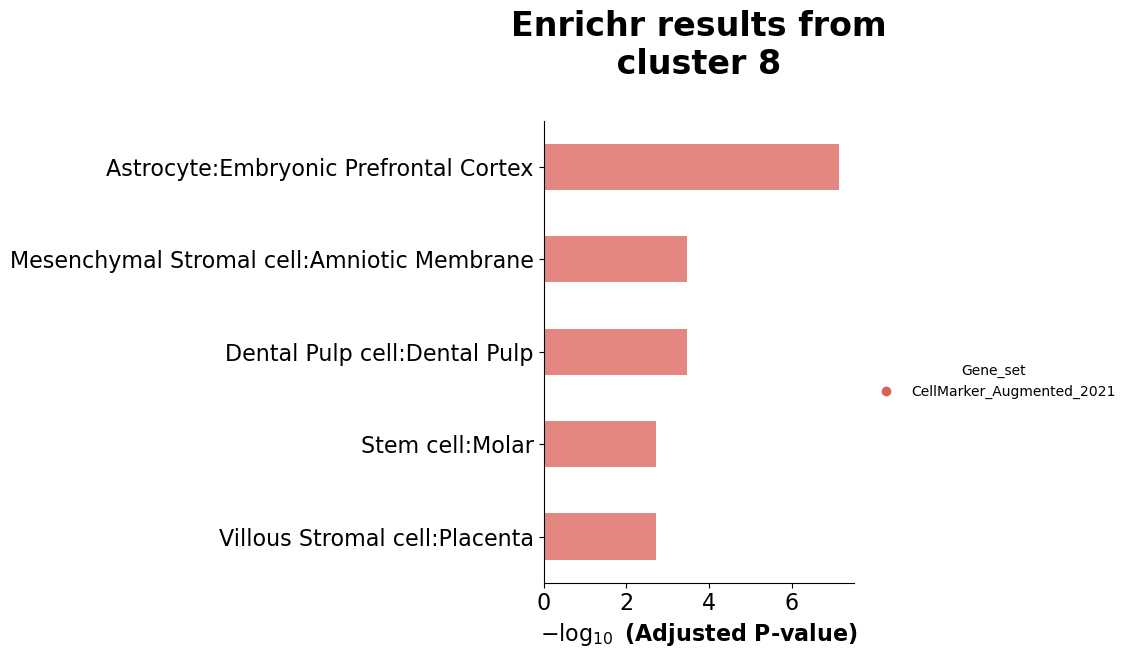

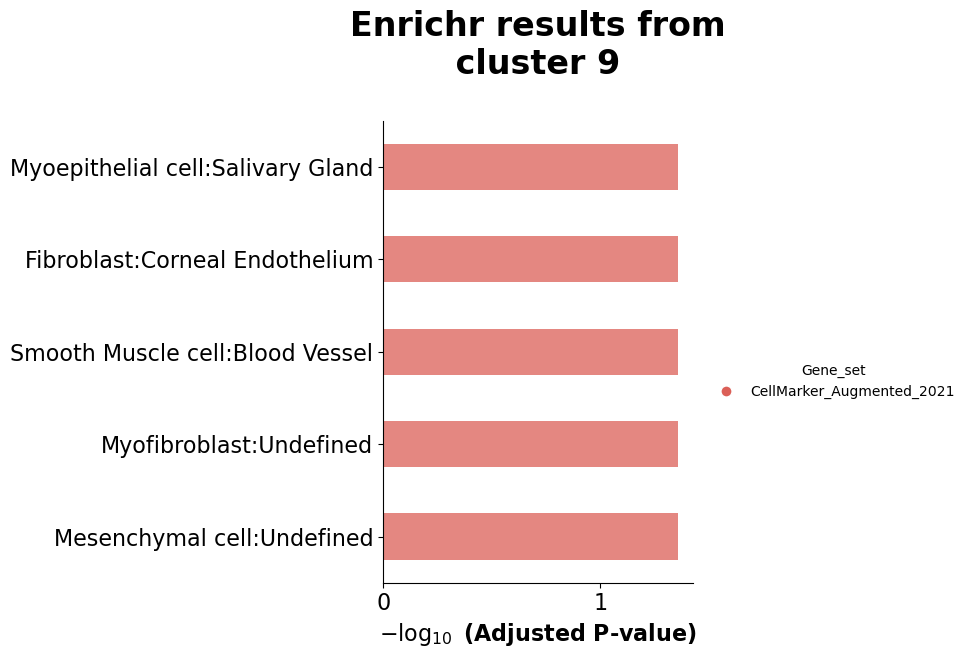

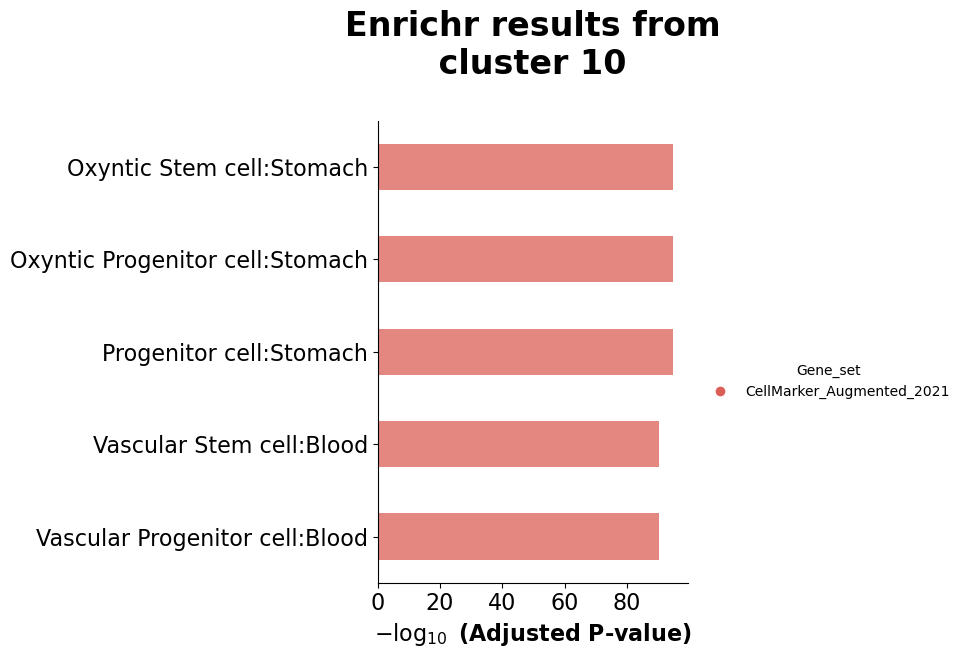

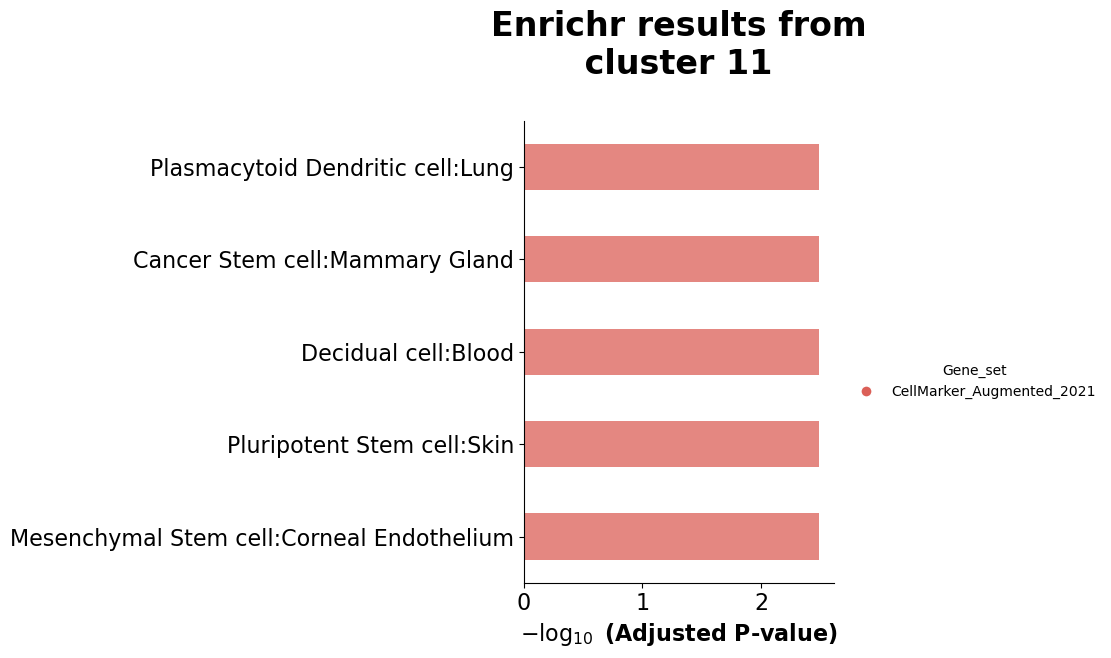

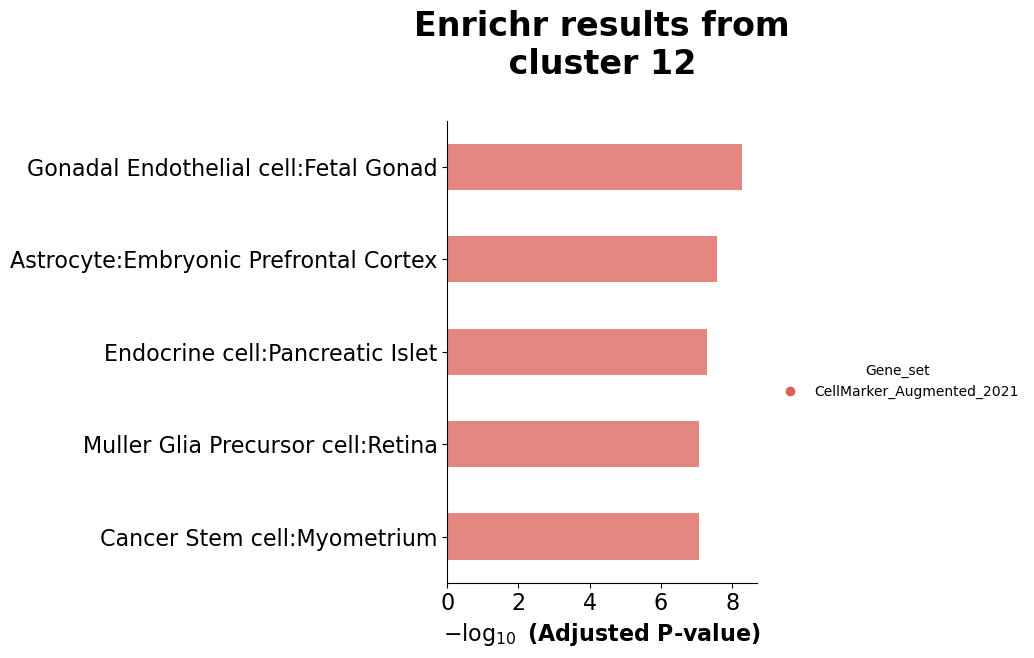

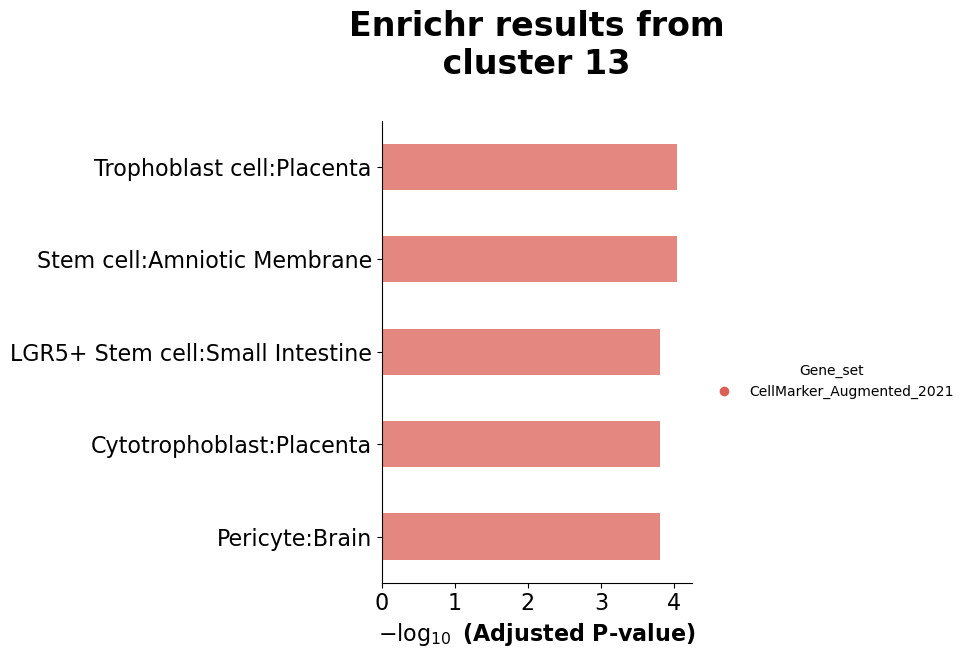

In [73]:
# Assuming subgroups is a dictionary with cluster IDs as keys and gene lists as values
for cluster_id, subgroup in subgroups.items():
    try:
        # Perform enrichment analysis
        enr = gseapy.enrichr(gene_list=subgroup,
                             gene_sets=['CellMarker_Augmented_2021'],
                             organism='Human',
                             cutoff=0.05)

        # Check if results are significant
        if enr.results.empty:
            print(f"No significant results for cluster {cluster_id}")
            continue  # Skip to the next iteration if no significant results

        # Plot results
        colors = seaborn.hls_palette(3)
        gseapy.barplot(enr.results,
                       column="Adjusted P-value",
                       group='Gene_set',
                       size=10,
                       top_term=5,
                       title=f'Enrichr results from\n cluster {cluster_id} \n',
                       color=colors)
        
    except Exception as e:
        # Handle and log the error
        print(f"Error in processing cluster {cluster_id}: {e}")
        continue  # Ensure the loop continues

    # Clean up
    del enr